# Preprocessing & Modeling

> In this notebook, we will be accessing the image directory of `Style` we had made in a previous notebook, `02_Data_Cleaning.ipynb`. We will set up the train and validation sets to train the model on and measure success by. Specifically, we will be using a CNN and testing various hyperparameters in efforts to create the best performing model.\n

> For full transparency and ability to recreate the results in this notebook: this code was run in `Google Colab` for access to GPUs for faster runtime and ability to use the library `tensorflow.keras` more easily.

---

## Imports

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [181]:
btc = pd.read_csv('../data/btc.csv', index_col='date') 

In [182]:
eth = pd.read_csv('../data/eth.csv', index_col='date') 

In [183]:
coin1 = pd.read_csv('../data/algo.csv') 

In [184]:
coin2 = pd.read_csv('../data/finu.csv') 

In [185]:
coin3 = pd.read_csv('../data/pepe.csv') 

In [186]:
btc.dropna(inplace=True)

TypeError: object of type 'int' has no len()

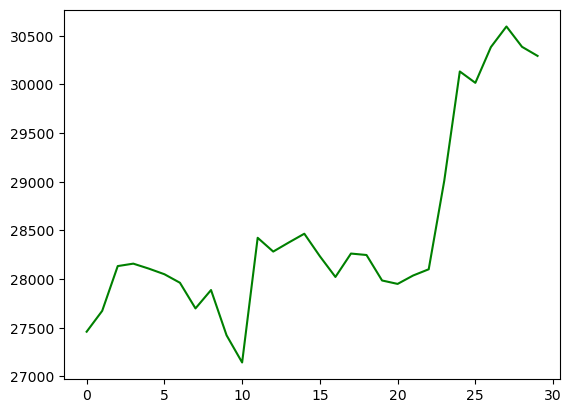

In [193]:
btc['close'].plot(xlabel='Days',
                  xticks=5,
                    ylabel='Price',
                    title='Bitcoin Price',
                    color='green'
                   );

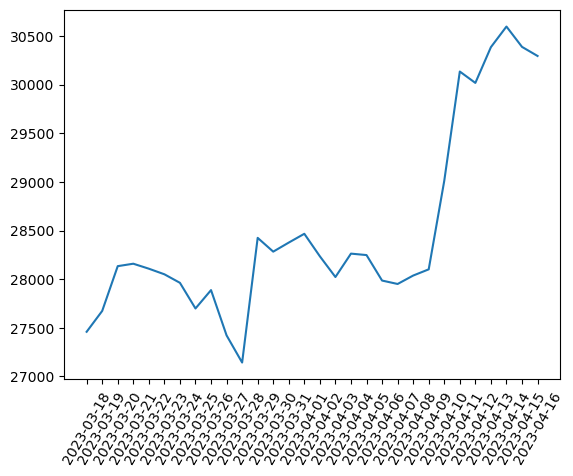

In [198]:
plt.plot(btc['close'])
plt.xticks(rotation = 60) # Rotates X-Axis Ticks by 45-degrees
plt.show()

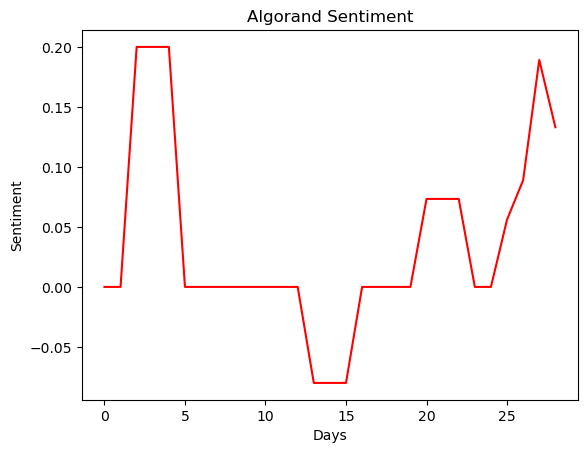

In [171]:
coin1['sentiment'].plot(xlabel='Days',
                    ylabel='Sentiment',
                    title='Algorand Sentiment',
                    color='red'
                   );

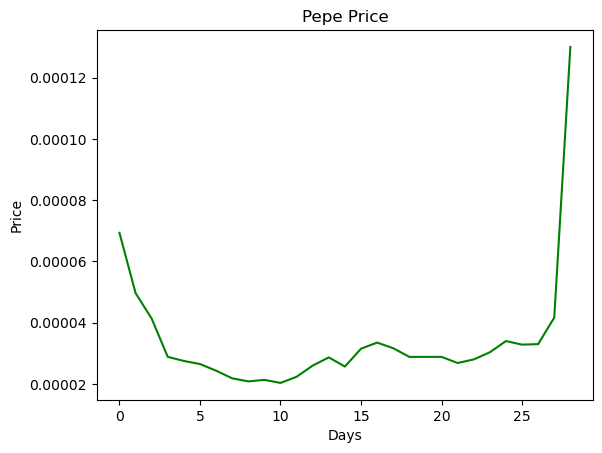

In [174]:
coin2['close'].plot(xlabel='Days',
                    ylabel='Price',
                    title='Pepe Price',
                    color='green'
                   );

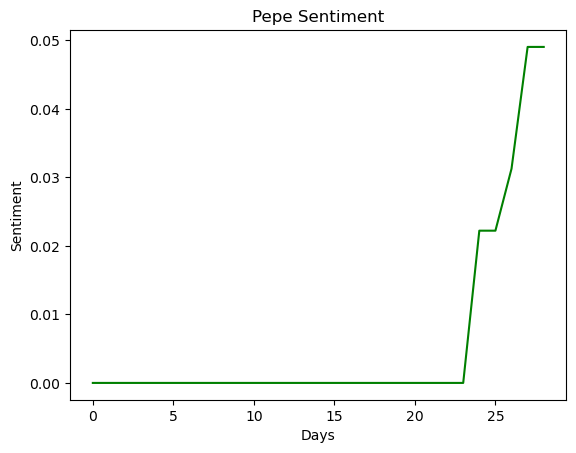

In [175]:
coin2['sentiment'].plot(xlabel='Days',
                    ylabel='Sentiment',
                    title='Pepe Sentiment',
                    color='green'
                   );

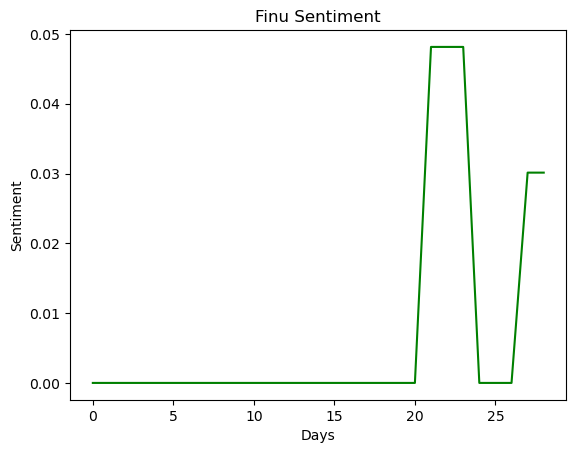

In [177]:
coin3['sentiment'].plot(xlabel='Days',
                    ylabel='Sentiment',
                    title='Finu Sentiment',
                    color='green'
                   );

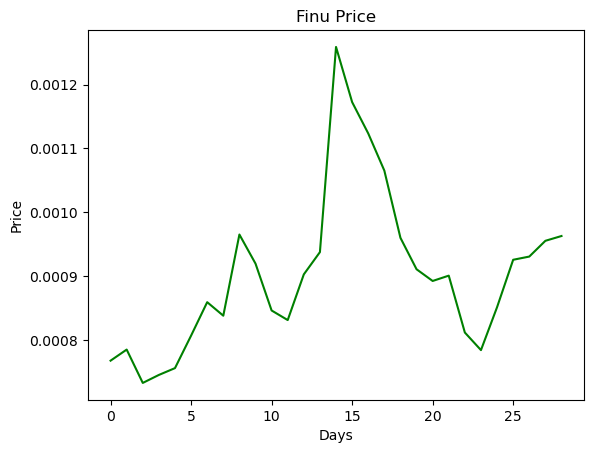

In [178]:
coin3['close'].plot(xlabel='Days',
                    ylabel='Price',
                    title='Finu Price',
                    color='green'
                   );

<AxesSubplot:>

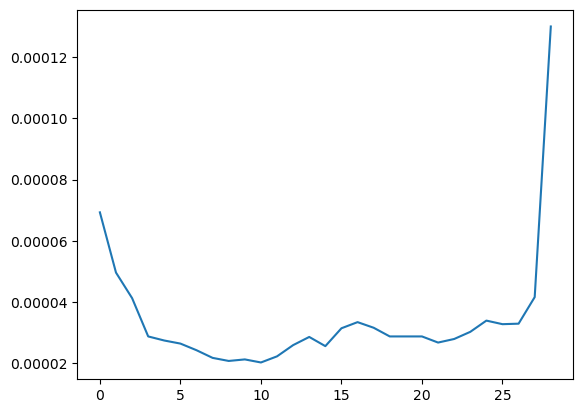

In [149]:
coin2['close'].plot()

<AxesSubplot:>

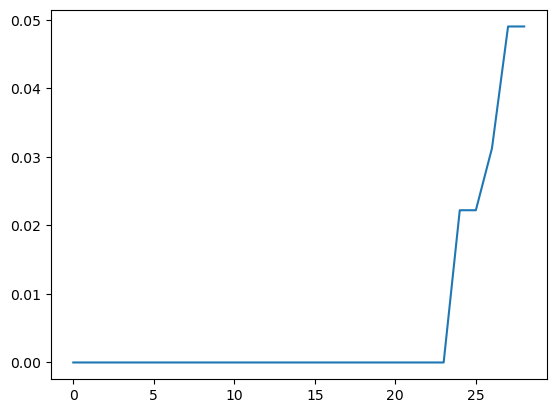

In [150]:
coin2['sentiment'].plot()

<AxesSubplot:>

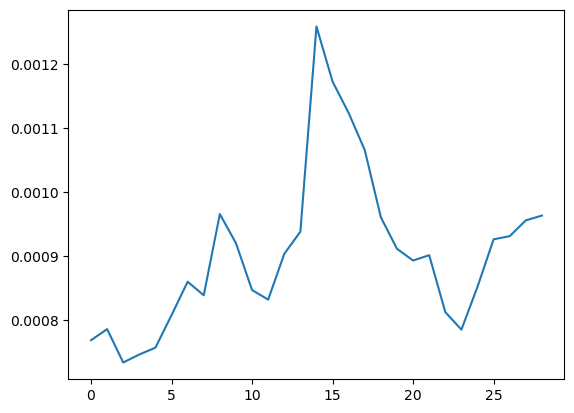

In [151]:
coin3['close'].plot()

<AxesSubplot:>

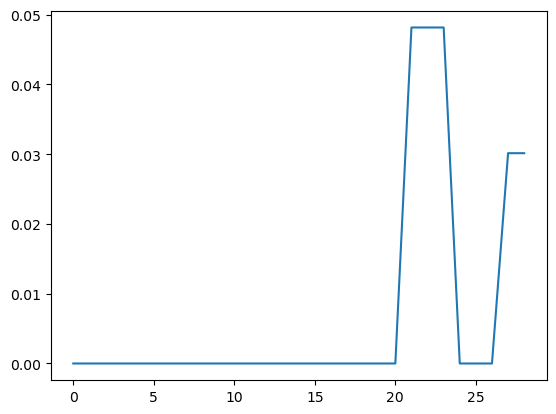

In [152]:
coin3['sentiment'].plot()

## Baseline Model for Classification Model

In [114]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=2023)

train = btc.iloc[:-10]
test = btc.iloc[-10:]

X = ['close', 'open', 'high', 'low', 'sentiment']

model.fit(train[X], train['target'])

RandomForestClassifier(min_samples_split=50, random_state=2023)

# Precision Score

In [118]:
preds = model.predict(test[X])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

C:\Users\tu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [120]:
btc['target'].value_counts()

0    16
1    14
Name: target, dtype: int64

In [88]:
btc

,open,high,low,close,sentiment,tomorrow,target
date,,,,,,,
2023-03-18,27456.048333,27531.768333,27364.693333,27459.511667,-0.020833,27673.546667,1
2023-03-19,27685.218333,27820.031667,27500.931667,27673.546667,0.260833,28133.746667,1
2023-03-20,28042.538333,28227.458333,27937.685000,28133.746667,0.090278,28158.811667,1
2023-03-21,28150.191667,28337.503333,28056.408333,28158.811667,0.075000,28107.591667,0
2023-03-22,28016.553333,28222.450000,27917.401667,28107.591667,0.170000,28050.140000,0
2023-03-23,28165.838333,28240.628333,27938.148333,28050.140000,0.282738,27962.461667,0
2023-03-24,28119.335000,28160.583333,27895.051667,27962.461667,0.650000,27698.843333,0
2023-03-25,27650.408333,27742.820000,27589.366667,27698.843333,0.257500,27887.713333,1
2023-03-26,27839.353333,27986.511667,27788.546667,27887.713333,0.245000,27422.450000,0


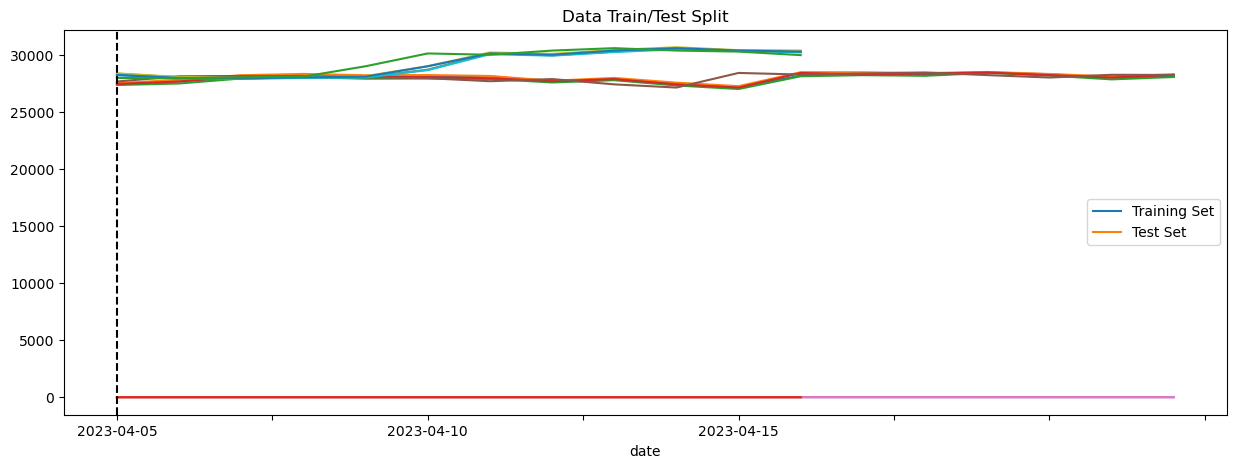

In [119]:
train = btc.loc[btc.index < '2023-04-05']
test = btc.loc[btc.index >= '2023-04-05']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2023-04-05', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [127]:
btc

,open,high,low,close,sentiment,tomorrow,target
date,,,,,,,
2023-03-18,27456.048333,27531.768333,27364.693333,27459.511667,-0.020833,27673.546667,1
2023-03-19,27685.218333,27820.031667,27500.931667,27673.546667,0.260833,28133.746667,1
2023-03-20,28042.538333,28227.458333,27937.685000,28133.746667,0.090278,28158.811667,1
2023-03-21,28150.191667,28337.503333,28056.408333,28158.811667,0.075000,28107.591667,0
2023-03-22,28016.553333,28222.450000,27917.401667,28107.591667,0.170000,28050.140000,0
2023-03-23,28165.838333,28240.628333,27938.148333,28050.140000,0.282738,27962.461667,0
2023-03-24,28119.335000,28160.583333,27895.051667,27962.461667,0.650000,27698.843333,0
2023-03-25,27650.408333,27742.820000,27589.366667,27698.843333,0.257500,27887.713333,1
2023-03-26,27839.353333,27986.511667,27788.546667,27887.713333,0.245000,27422.450000,0


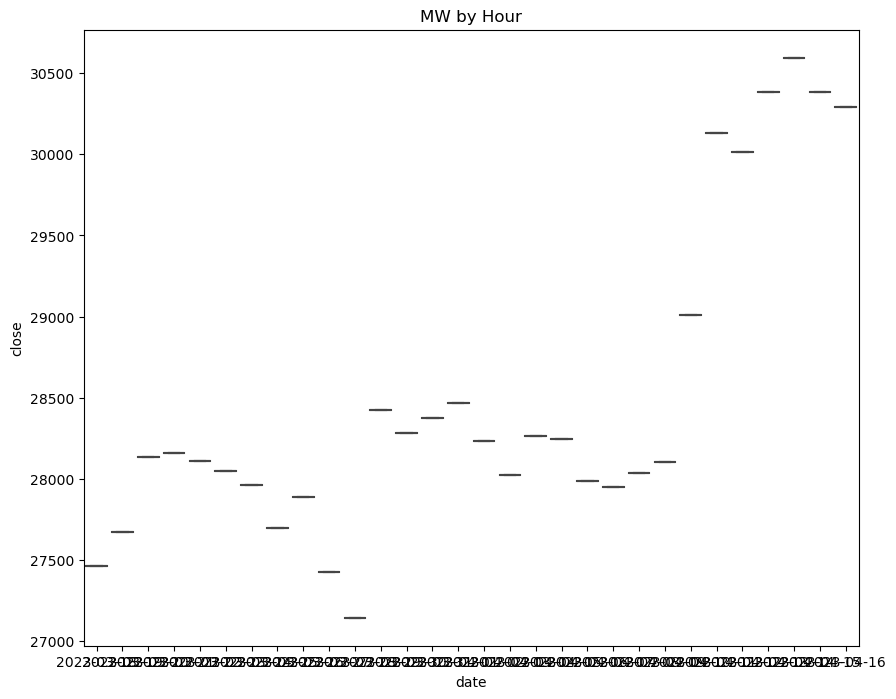

In [131]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=btc, x=btc.index, y='close')
ax.set_title('MW by Hour')
plt.show()

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['close', 'open', 'high', 'low', 'sentiment']
TARGET = 'PJME_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]